In [ ]:
import pandas as pd
import numpy as np
from numpy import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_excel('/content/Life Expectancy Data (1).xlsx')

In [ ]:
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [ ]:
df.shape

(2938, 22)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10  BMI                              2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [ ]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years',
       'thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')

In [ ]:
df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
BMI                                 34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
HIV/AIDS                             0
GDP                                448
Population                         652
thinness  1-19 years                34
thinness 5-9 years                  34
Income composition of resources    167
Schooling                          163
dtype: int64

In [ ]:
df.isnull().sum()/df.shape[0]*100


Country                             0.000000
Year                                0.000000
Status                              0.000000
Life expectancy                     0.340368
Adult Mortality                     0.340368
infant deaths                       0.000000
Alcohol                             6.603131
percentage expenditure              0.000000
Hepatitis B                        18.822328
Measles                             0.000000
BMI                                 1.157250
under-five deaths                   0.000000
Polio                               0.646698
Total expenditure                   7.692308
Diphtheria                          0.646698
HIV/AIDS                            0.000000
GDP                                15.248468
Population                         22.191967
thinness  1-19 years                1.157250
thinness 5-9 years                  1.157250
Income composition of resources     5.684139
Schooling                           5.547992
dtype: flo

In [ ]:
df['Life expectancy'].unique()

array([65. , 59.9, 59.5, 59.2, 58.8, 58.6, 58.1, 57.5, 57.3, 57. , 56.7,
       56.2, 55.3, 54.8, 77.8, 77.5, 77.2, 76.9, 76.6, 76.2, 76.1, 75.3,
       75.9, 74.2, 73.5, 73. , 72.8, 73.3, 73.6, 72.6, 75.6, 75.4, 75.1,
       74.9, 74.7, 74.4, 74.1, 73.8, 73.4, 72.9, 72.3, 71.7, 71.6, 71.4,
       71.3, 52.4, 51.7, 51.1, 56. , 51. , 49.6, 49.1, 48.7, 48.2, 47.7,
       47.4, 47.1, 46.8, 46.5, 45.7, 45.3, 76.4, 75.7, 75.2, 75. , 74.8,
       74.6, 74. , 76.3, 76. , 75.5, 73.9, 73.2, 72.7, 72. , 82.8, 82.7,
       82.5, 82.3, 82. , 81.9, 81.7, 81.3, 81.2, 81. , 86. , 83. , 79.9,
       79.5, 81.5, 81.4, 81.1, 88. , 84. , 79.8, 79.4, 79.3, 78.8, 78.7,
       78.6, 78.1, 72.5, 72.2, 71.9, 71.1, 78. , 69.2, 68.4, 67.8, 67.5,
       66.6, 74.5, 73.1, 76.8, 76.7, 76.5, 75.8, 71.8, 71. , 77. , 69.9,
       69.5, 69.1, 68.6, 68.2, 67.3, 66.8, 66.3, 65.8, 65.3, 73.7, 70. ,
       69.8, 68.9, 68.1, 67.7, 67.2, 68. , 89. , 87. , 80. , 78.9, 78.3,
       77.6, 69.4, 69.6, 69. , 68.7, 68.5, 68.3, 60

In [ ]:
df['Life expectancy'].mean()

69.22493169398908

In [ ]:
df['Life expectancy'].mode()

0    73.0
Name: Life expectancy, dtype: float64

In [ ]:
df['Life expectancy'].median()

72.1

In [ ]:
df['Life expectancy']=df['Life expectancy'].fillna(df['Life expectancy'].mean().round(0))

In [ ]:
df['Life expectancy'].isnull().sum()

0

In [ ]:
df['Adult Mortality'].unique()

array([263., 271., 268., 272., 275., 279., 281., 287., 295., 291., 293.,
         3., 316., 321.,  74.,   8.,  84.,  86.,  88.,  91.,   1.,   9.,
        99.,  15.,  17.,  18.,  14.,  11.,  19., 112., 113., 116., 119.,
       123., 126., 129., 132., 136., 146., 145., 335., 348., 355., 358.,
       361., 365., 369., 371., 375., 381., 382., 386., 388., 391.,  44.,
        48.,  13., 131., 133., 134., 138., 142., 144., 147., 149., 151.,
       153., 154., 156., 118.,  12., 121., 127., 137., 128., 141.,  59.,
         6.,  61.,  63.,  64.,  66.,  67.,  69.,  71.,  73.,  75.,  78.,
        65.,  68.,   7.,  77.,  76.,  81.,  85.,  92.,  96., 125., 162.,
        16., 172., 167., 161., 168., 171., 174., 189., 192.,  79.,  83.,
        87., 135., 152., 155., 158., 164., 173.,  98., 111., 115., 117.,
       196., 199.,  23., 194., 232., 222., 226., 224., 243., 252., 247.,
       253., 262., 254.,  89.,  95., 175., 177., 188., 186., 184., 181.,
       191., 197.,  21., 249., 251., 259., 278., 28

In [ ]:
df['Adult Mortality'].mean().round(0)

165.0

In [ ]:
df['Adult Mortality'].median()


144.0

In [ ]:
df['Adult Mortality']=df['Adult Mortality'].fillna(df['Adult Mortality'].median())

In [ ]:
df['Adult Mortality'].isnull().sum()

0

In [ ]:
df['Alcohol'].unique()

array([0.01, 0.03, 0.02, ..., 2.44, 3.56, 4.57])

In [ ]:
df['Alcohol'].mean()

4.602860787172012

In [ ]:
df['Alcohol'].median()

3.755

In [ ]:
df['Alcohol']=df['Alcohol'].fillna(df['Alcohol'].median())

In [ ]:
df['Hepatitis B'].unique()

array([65., 62., 64., 67., 68., 66., 63., 99., 98., 97., 96., 95., 94.,
       91.,  9.,  8., 83., 81., nan, 77., 75., 72., 61., 69., 73., 85.,
       84., 88., 93., 89., 78., 55., 92., 86., 44., 33., 74., 52., 49.,
        5., 51., 21., 45., 11., 87., 18., 56.,  7.,  6., 76., 82., 79.,
       15., 36., 48.,  1.,  4., 42., 28., 14., 47., 23., 46., 37., 39.,
       24., 17., 27., 25., 16.,  2., 35., 29., 26., 54., 57., 38., 59.,
       71., 43., 58., 41., 31., 12., 32., 22., 53., 19.])

In [ ]:
df['Hepatitis B'].mean()

80.94046121593291

In [ ]:
df['Hepatitis B'].median()

92.0

In [ ]:
df['Hepatitis B']=df['Hepatitis B'].fillna(df['Hepatitis B'].median())

In [ ]:
df['BMI'].unique()

array([19.1, 18.6, 18.1, 17.6, 17.2, 16.7, 16.2, 15.7, 15.2, 14.7, 14.2,
       13.8, 13.4, 13. , 12.6, 12.2, 58. , 57.2, 56.5, 55.8, 55.1, 54.3,
       53.5, 52.6, 51.7,  5.8, 49.9, 48.9, 47.9, 46.9, 46. , 45. , 59.5,
       58.4, 56.1, 55. , 53.9, 52.8, 51.8, 49.8, 47. , 46.1, 45.3, 44.4,
       23.3, 22.7, 22.1, 21.5, 21. ,  2.4, 19.8, 19.3, 18.8, 18.2, 17.7,
       16.8, 16.3, 15.8, 15.4, 47.7, 46.4, 45.7, 45.1, 43.8, 43.2, 42.6,
       42. , 41.4,  4.8,  4.1, 39.5, 38.9, 38.2, 62.8, 62.2, 61.6, 61. ,
        6.4, 59.8, 59.2, 58.6, 57.5, 56.9, 56.3, 55.7, 54.6, 54. , 54.9,
       54.1, 53.3, 51.9, 51.2,  5.7,  5.1, 49.7, 49.2, 48.8, 48.4, 48.1,
       47.8, 47.4, 47.1, 66.6, 66.1, 65.5, 65. , 64.4, 63.9, 63.4, 62.9,
       62.5, 62. , 61.5,  6.9,  6.3, 59.6, 59. , 58.2, 57.6, 57.1, 56.6,
       55.2, 54.7, 54.2, 53.7, 53.2, 52.7, 52.2,  5.6, 52.5, 51.5, 48. ,
       47.3, 46.6, 45.9, 44.7, 44.2, 43.6, 43.1, 42.1, 64.5, 63.8, 63.2,
       62.6, 61.3,  6.7,  6.1, 59.4, 58.7, 58.1, 57

In [ ]:
df['BMI'].mean().round(0)

38.0

In [ ]:
df['BMI'].median()

43.5

In [ ]:
df['BMI']=df['BMI'].fillna(df['BMI'].mean().round(0))

In [ ]:
df['Polio'].unique()

array([ 6., 58., 62., 67., 68., 66., 63., 64.,  5., 41., 36., 35., 24.,
       99., 98., 97., 95., 94., 92., 88., 86., 87., 89.,  7., 75., 73.,
       81., 65., 39.,  4., 37.,  3., 96., 93., 91., 85.,  9., 83., 84.,
       82., 71.,  8., 79., 78., 77., 53., 74., 76., 69., 45., 72., 54.,
       59., 61., 57., 47., 23., 46., 44., 42., 38., 52., 51., 43., 32.,
       49., 31., 26., 17., 55., 48., 56., nan, 33.])

In [ ]:
df['Polio'].mean()

82.55018842069202

In [ ]:
df['Polio'].median()

93.0

In [ ]:
df['Polio']=df['Polio'].fillna(df['Polio'].mean().round(0))

In [ ]:
df['Total expenditure'].unique()

array([ 8.16,  8.18,  8.13,  8.52,  7.87,  9.2 ,  9.42,  8.33,  6.73,
        7.43,  8.7 ,  8.79,  8.82,  7.76,  7.8 ,  8.2 ,  6.  ,  5.88,
        5.66,  5.59,  5.71,  5.34,  5.79,  5.87,  6.1 ,  5.86,  6.12,
        6.38,  6.27,  6.3 ,  6.26,   nan,  7.21,  7.12,  6.14,  5.29,
        5.12,  5.36,  4.2 ,  3.82,  3.36,  3.24,  3.54,  3.6 ,  3.73,
        3.84,  3.49,  3.31,  4.26,  3.3 ,  3.38,  3.39,  4.37,  4.54,
        4.1 ,  4.71,  4.41,  3.63,  5.38,  2.79,  5.54,  5.33,  5.39,
        5.65,  5.63,  4.86,  4.69,  4.27,  4.34,  4.21,  4.53,  4.48,
        4.13,  4.79,  4.99,  5.2 ,  5.89,  6.55,  7.63,  6.66,  6.49,
        6.68,  6.85,  6.84,  8.22,  8.31,  9.38,  9.21,  4.55,  3.71,
        4.56,  3.8 ,  4.31,  4.58,  5.25,  5.5 ,  5.56,  5.4 ,  5.94,
        6.25,  9.36,  9.5 ,  8.78,  8.53,  8.49,  8.45,  8.57,  8.32,
        8.39,  8.8 , 11.21, 11.14, 11.17,  1.94, 11.19,  1.6 ,  1.4 ,
        1.35,  1.53,  1.56,  1.48,  1.27,  1.12,  6.4 ,  5.37,  5.1 ,
        5.85,  6.17,

In [ ]:
df['Total expenditure'].mean().round(2)

5.94

In [ ]:
df['Total expenditure'].median()

5.755

In [ ]:
df['Total expenditure']=df['Total expenditure'].fillna(df['Total expenditure'].mean().round(0))

In [ ]:
df['Diphtheria'].unique()

array([65., 62., 64., 67., 68., 66., 63., 58.,  5., 41., 36., 33., 24.,
       99., 98., 97., 95., 93., 88., 86., 87., 89., 77., 75., 71.,  6.,
       69., 73., 34., 38.,  4., 28., 94., 91., 96., 83.,  9., 92., 85.,
       84., 81., 79., 78., 76., 82.,  8., 74.,  7., 72., 45., 61., 54.,
       59., 47., 23., 42., 48., 51., 44., 37., 46., 39., 19., 25., 21.,
       26., 31., 56.,  3., 53., 16.,  2., 43., 35., 32., 57., 49., 55.,
       52., nan, 29., 27.])

In [ ]:
df['Diphtheria'].mean().round(0)

82.0

In [ ]:
df['Diphtheria'].median()

93.0

In [ ]:
df['Diphtheria']=df['Diphtheria'].fillna(df['Diphtheria'].median())

In [ ]:
df['GDP'].unique()

array([584.25921  , 612.696514 , 631.744976 , ...,  57.34834  ,
       548.587312 , 547.3588785])

In [ ]:
df['GDP'].isnull().sum()

448

In [ ]:
df['GDP'].mean()

7483.158469138474

In [ ]:
df['GDP'].median()

1766.947595

In [ ]:
df['GDP']=df['GDP'].fillna(df['GDP'].median())

In [ ]:
df['Population'].unique()

array([33736494.,   327582., 31731688., ...,   125525., 12366165.,
       12222251.])

In [ ]:
df['Population'].mean()

12753375.120052494

In [ ]:
df['Population'].median()

1386542.0

In [ ]:
df['Population']=df['Population'].fillna(df['Population'].mean().round(0))

In [ ]:
df['thinness  1-19 years'].unique()

array([17.2, 17.5, 17.7, 17.9, 18.2, 18.4, 18.6, 18.8, 19. , 19.2, 19.3,
       19.5, 19.7, 19.9,  2.1,  2.3,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,
        1.8,  1.9,  2. ,  6. ,  5.9,  6.1,  6.2,  6.3,  6.4,  6.5,  8.3,
        8.5,  8.6,  8.8,  8.9,  9.1,  9.3,  9.5,  9.6,  9.8,  1. ,  3.3,
        3.4,  3.5,  3.6,  3.7,  1.1,  0.6,  0.7,  2.8,  2.9,  3. ,  3.1,
        3.2,  2.5,  2.6,  2.7, 18.1, 18.3, 18.5, 18.7, 18.9, 19.1,  3.8,
        3.9,  4. ,  4.1,  4.2,  4.3,  2.2,  2.4,  0.9,  0.8,  6.9,  7.1,
        7.2,  7.4,  7.6,  7.8,  7.9,  8.1,  8.7,  9.7, 15.4, 15.7, 15.9,
       16.1, 16.3, 16.6, 16.8, 17.1, 17.3, 17.8, 18. ,  6.7,  7. ,  7.3,
        7.7,  8. ,  8.4,  9.2, 11.4, 11.8, 12.3,  5.7,  5.8,  6.6,  6.8,
        8.2,  9. , 11. , 11.2,  7.5,  5.5,  5.6,  9.4, 11.1, 11.3, 11.5,
       11.6,  0.5,  9.9,  4.4,  4.5,  4.7,  4.8,  5. ,  5.1,  5.3,  0.1,
        4.9,  5.2,  5.4, 11.7, 11.9, 12.1, 12.2, 12.4,  4.6, 26.7, 26.8,
       26.9, 27. , 27.1, 27.2, 27.3, 27.4, 27.5, 27

In [ ]:
df['thinness  1-19 years'].mean()

4.839703856749312

In [ ]:
df['thinness  1-19 years'].median()

3.3

In [ ]:
df['thinness  1-19 years'].isnull().sum()

34

In [ ]:
df['thinness  1-19 years']=df['thinness  1-19 years'].fillna(df['thinness  1-19 years'].mean().round(0))


In [ ]:
df['thinness 5-9 years'].unique()

array([17.3, 17.5, 17.7, 18. , 18.2, 18.4, 18.7, 18.9, 19.1, 19.3, 19.5,
       19.7, 19.9,  2.2,  2.4,  2.5,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,
        1.9,  2. ,  2.1,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  8.2,
        8.3,  8.5,  8.6,  8.8,  9. ,  9.2,  9.4,  9.6,  9.7,  9.9,  1.1,
        3.3,  3.4,  3.5,  3.6,  0.9,  1. ,  0.6,  0.7,  2.9,  2.8,  3. ,
        3.1,  2.6, 18.3, 18.6, 18.8, 19. , 19.2, 19.4,  2.3,  2.7, 21.1,
       21.3, 21.5,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  0.8,  6.8,  6.9,
        7.1,  7.3,  7.5,  7.6,  7.8,  8. ,  8.4, 16. , 16.2, 16.5, 16.7,
       17. , 17.8, 18.1, 19.6,  1.2,  3.2,  6.7,  7. ,  7.4, 11.3, 11.8,
       12.2,  5.1,  5.2,  5.3,  5.4,  5.5,  5.6,  5.7,  7.7,  7.9,  8.1,
        9.1,  9.3,  9.8, 11.1,  7.2,  8.7,  8.9,  6.6,  9.5, 11. , 11.2,
       11.4, 11.5, 11.6, 11.7, 11.9,  6.5,  0.5,  0.4,  4.3,  4.4,  4.6,
        4.7,  4.9,  5. ,  0.1, 12.1, 12.3,  4.5,  4.8, 27.3, 27.4, 27.5,
       27.6, 27.7, 27.8, 27.9, 28. , 28.1, 28.2, 28

In [ ]:
df['thinness 5-9 years'].isnull().sum()

34

In [ ]:
df['thinness 5-9 years'].mean()

4.870316804407714

In [ ]:
df['thinness 5-9 years'].median()

3.3

In [ ]:
df['thinness 5-9 years']=df['thinness 5-9 years'].fillna(df['thinness 5-9 years'].mean().round(0))

In [ ]:
df['Income composition of resources'].unique()

array([0.479, 0.476, 0.47 , 0.463, 0.454, 0.448, 0.434, 0.433, 0.415,
       0.405, 0.396, 0.381, 0.373, 0.341, 0.34 , 0.338, 0.762, 0.761,
       0.759, 0.752, 0.738, 0.725, 0.721, 0.713, 0.703, 0.696, 0.685,
       0.681, 0.674, 0.67 , 0.662, 0.656, 0.743, 0.741, 0.737, 0.732,
       0.724, 0.714, 0.705, 0.697, 0.69 , 0.686, 0.68 , 0.673, 0.663,
       0.653, 0.644, 0.636, 0.531, 0.527, 0.523, 0.508, 0.495, 0.488,
       0.48 , 0.468, 0.439, 0.426, 0.406, 0.401, 0.391, 0.382, 0.784,
       0.782, 0.781, 0.778, 0.783, 0.788, 0.786, 0.773, 0.   , 0.826,
       0.825, 0.823, 0.822, 0.816, 0.802, 0.794, 0.792, 0.78 , 0.775,
       0.77 , 0.776, 0.771, 0.764, 0.739, 0.736, 0.729, 0.72 , 0.707,
       0.692, 0.679, 0.668, 0.657, 0.645, 0.639, 0.937, 0.936, 0.933,
       0.93 , 0.927, 0.925, 0.921, 0.918, 0.915, 0.91 , 0.908, 0.905,
       0.902, 0.899, 0.897, 0.892, 0.887, 0.884, 0.88 , 0.872, 0.87 ,
       0.864, 0.86 , 0.854, 0.848, 0.841, 0.837, 0.847, 0.833, 0.758,
       0.745, 0.742,

In [ ]:
df['Income composition of resources'].isnull().sum()

167

In [ ]:
df['Income composition of resources'].mean().round(3)

0.628

In [ ]:
df['Income composition of resources'].median()

0.677

In [ ]:
df['Income composition of resources']=df['Income composition of resources'].fillna(df['Income composition of resources'].mean().round(3))

In [ ]:
df['Schooling'].isnull().sum()

163

In [ ]:
df['Schooling'].unique()

array([10.1, 10. ,  9.9,  9.8,  9.5,  9.2,  8.9,  8.7,  8.4,  8.1,  7.9,
        6.8,  6.5,  6.2,  5.9,  5.5, 14.2, 13.3, 12.5, 12.2, 12. , 11.6,
       11.4, 10.8, 10.9, 10.7, 10.6, 14.4, 14. , 13.6, 13.1, 12.6, 12.3,
       11.7, 11.5, 11.1, 10.3,  9.4,  9. ,  8.5,  7.7,  7.2,  6.4,  5.1,
        4.6, 13.9, 13.8, 14.1, 14.5, 14.7,  0. , 17.3, 17.2, 17.1, 16.8,
       16.5, 16.3, 16.1, 16.4, 15.6, 15. , 12.7, 11.9, 11.2, 20.4, 20.3,
       20.1, 19.8, 19.5, 19.1, 19. , 20.7, 20.6, 20.5, 15.9, 15.7, 15.4,
       15.3, 15.1, 15.2, 14.9, 15.5, 11.8, 11. , 10.4, 12.4, 12.1, 13.7,
       13.5, 13.2, 10.2,  8.6,  8.2,  7.5,  7.3, 15.8, 14.8, 14.6, 16.6,
       16.2, 18.8, 18.6, 18.2, 18. , 12.8, 12.9,  9.3,  9.1,  6.6, 10.5,
        9.6,  8.8,  8. ,  7.6, 14.3, 13.4,  6.7,  6.3,  5.4,  4.9,  4.7,
        4.3,  3.9,  3.8,  3.6,  3.5,  3.4,  5.6,  5.2,  4.4,  4.5,  nan,
       11.3,  9.7,  8.3,  7.1,  6.9,  6. ,  5.7,  5.3, 13. , 17.6, 17.7,
       16. , 19.2, 18.7, 18.4, 16.9, 16.7,  5. ,  4

In [ ]:
df['Schooling'].mean()

11.992792792792793

In [ ]:
df['Schooling'].median()

12.3

In [ ]:
df['Schooling']=df['Schooling'].fillna(df['Schooling'].median())

In [ ]:
df.isnull().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
BMI                                0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
HIV/AIDS                           0
GDP                                0
Population                         0
thinness  1-19 years               0
thinness 5-9 years                 0
Income composition of resources    0
Schooling                          0
dtype: int64

In [ ]:
df['thinness  1-19 years'].unique()

array([17.2, 17.5, 17.7, 17.9, 18.2, 18.4, 18.6, 18.8, 19. , 19.2, 19.3,
       19.5, 19.7, 19.9,  2.1,  2.3,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,
        1.8,  1.9,  2. ,  6. ,  5.9,  6.1,  6.2,  6.3,  6.4,  6.5,  8.3,
        8.5,  8.6,  8.8,  8.9,  9.1,  9.3,  9.5,  9.6,  9.8,  1. ,  3.3,
        3.4,  3.5,  3.6,  3.7,  1.1,  0.6,  0.7,  2.8,  2.9,  3. ,  3.1,
        3.2,  2.5,  2.6,  2.7, 18.1, 18.3, 18.5, 18.7, 18.9, 19.1,  3.8,
        3.9,  4. ,  4.1,  4.2,  4.3,  2.2,  2.4,  0.9,  0.8,  6.9,  7.1,
        7.2,  7.4,  7.6,  7.8,  7.9,  8.1,  8.7,  9.7, 15.4, 15.7, 15.9,
       16.1, 16.3, 16.6, 16.8, 17.1, 17.3, 17.8, 18. ,  6.7,  7. ,  7.3,
        7.7,  8. ,  8.4,  9.2, 11.4, 11.8, 12.3,  5.7,  5.8,  6.6,  6.8,
        8.2,  9. , 11. , 11.2,  7.5,  5.5,  5.6,  9.4, 11.1, 11.3, 11.5,
       11.6,  0.5,  9.9,  4.4,  4.5,  4.7,  4.8,  5. ,  5.1,  5.3,  0.1,
        4.9,  5.2,  5.4, 11.7, 11.9, 12.1, 12.2, 12.4,  4.6, 26.7, 26.8,
       26.9, 27. , 27.1, 27.2, 27.3, 27.4, 27.5, 27

In [ ]:
df['thinness  1-19 years']=df['thinness  1-19 years'].fillna(df['thinness  1-19 years'].median())

In [ ]:
df.isnull().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
BMI                                0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
HIV/AIDS                           0
GDP                                0
Population                         0
thinness  1-19 years               0
thinness 5-9 years                 0
Income composition of resources    0
Schooling                          0
dtype: int64

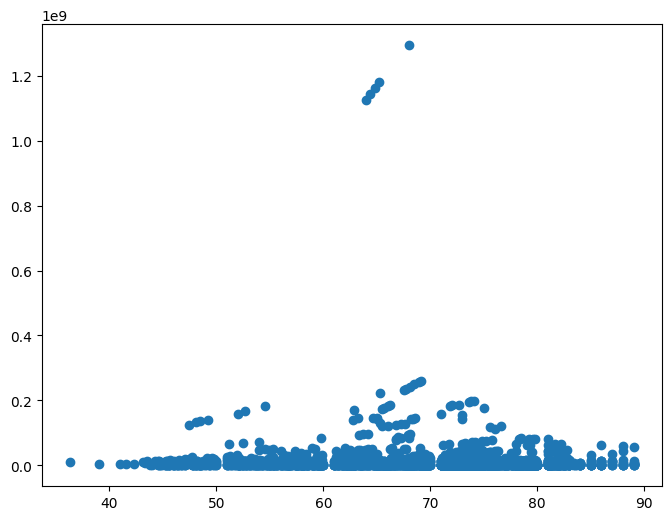

In [ ]:

plt.figure(figsize=(8,6))
plt.scatter(df['Life expectancy'],df['Population'])
plt.show()

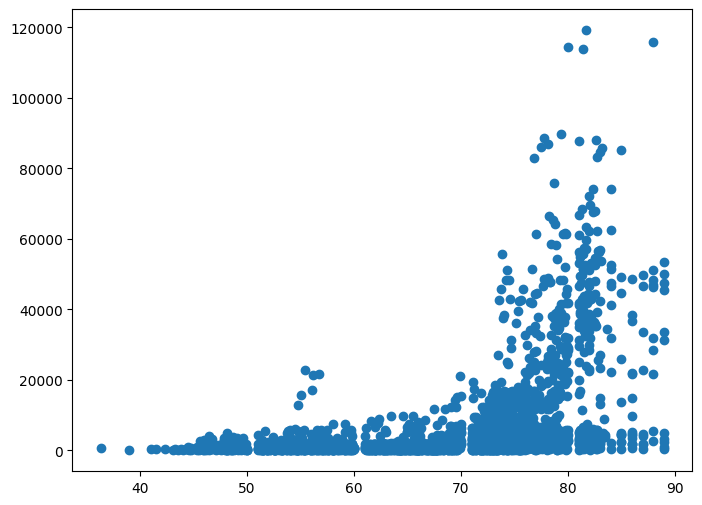

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(df['Life expectancy'],df['GDP'])
plt.show()

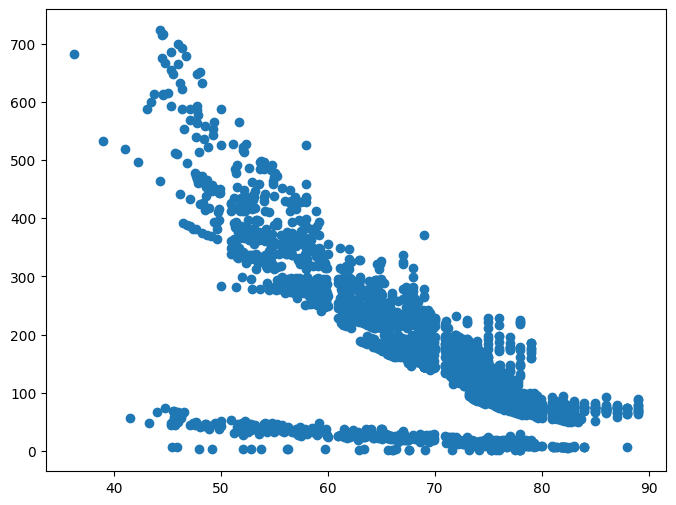

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(df['Life expectancy'],df['Adult Mortality'])
plt.show()

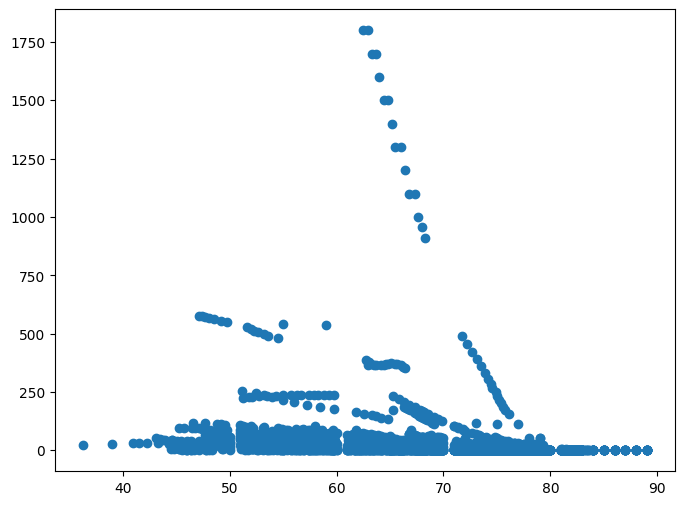

In [ ]:
# infant deaths

plt.figure(figsize=(8,6))
plt.scatter(df['Life expectancy'],df['infant deaths'])
plt.show()

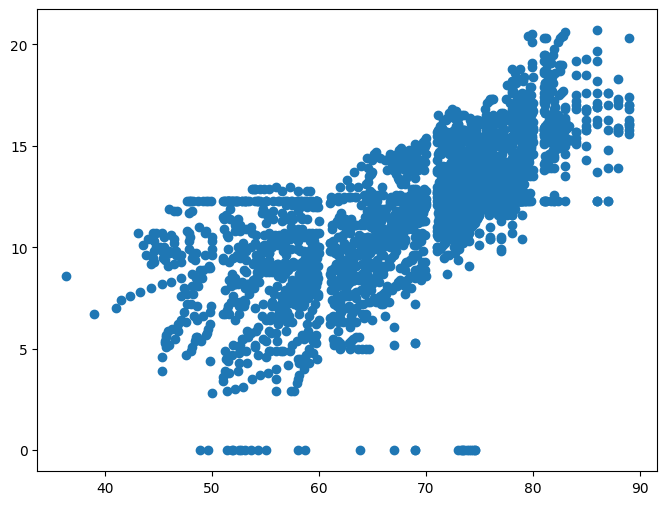

In [ ]:
# Schooling

plt.figure(figsize=(8,6))
plt.scatter(df['Life expectancy'],df['Schooling'])
plt.show()

In [ ]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years',
       'thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')

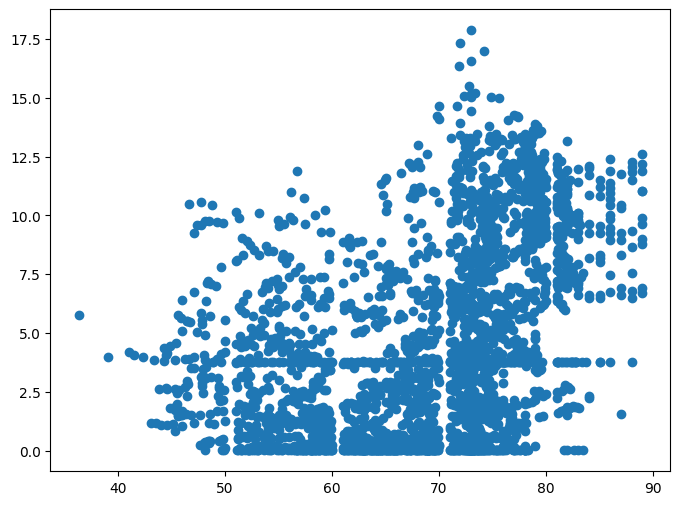

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(df['Life expectancy'],df['Alcohol'])
plt.show()

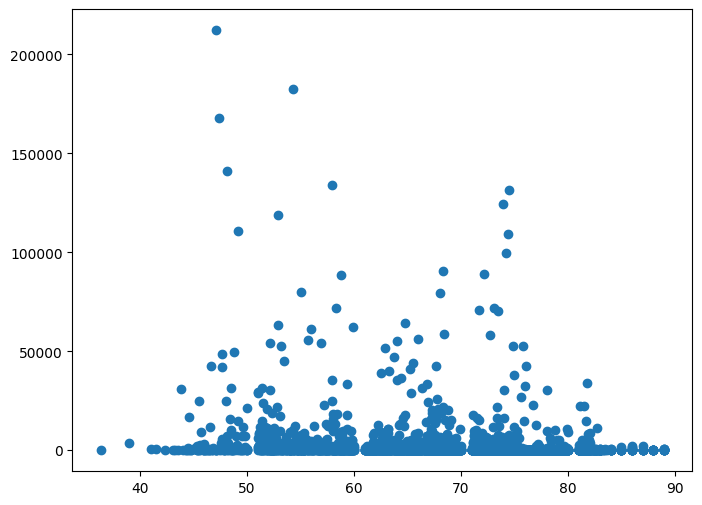

In [ ]:
# Measles

plt.figure(figsize=(8,6))
plt.scatter(df['Life expectancy'],df['Measles'])
plt.show()

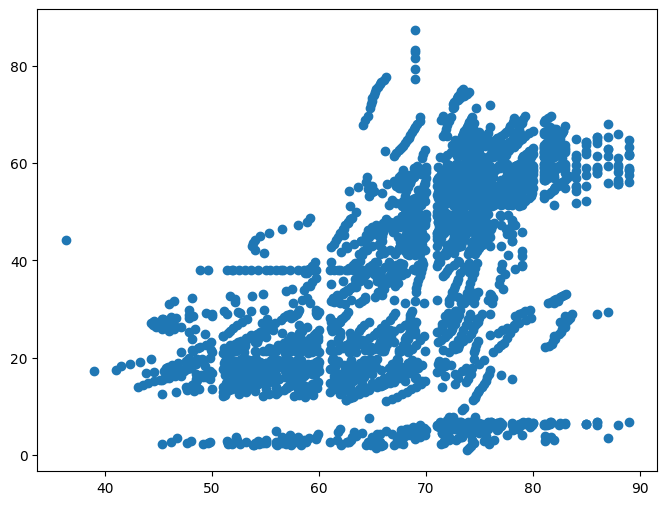

In [ ]:
# BMI

plt.figure(figsize=(8,6))
plt.scatter(df['Life expectancy'],df['BMI'])
plt.show()

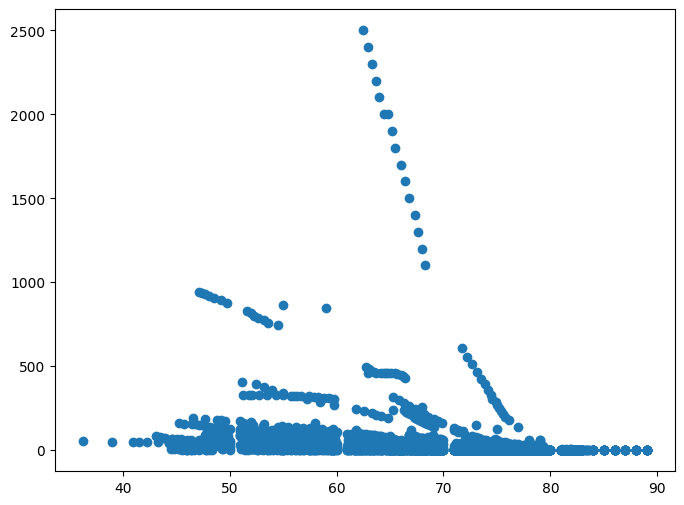

In [ ]:
# under-five deaths

plt.figure(figsize=(8,6))
plt.scatter(df['Life expectancy'],df['under-five deaths'])
plt.show()

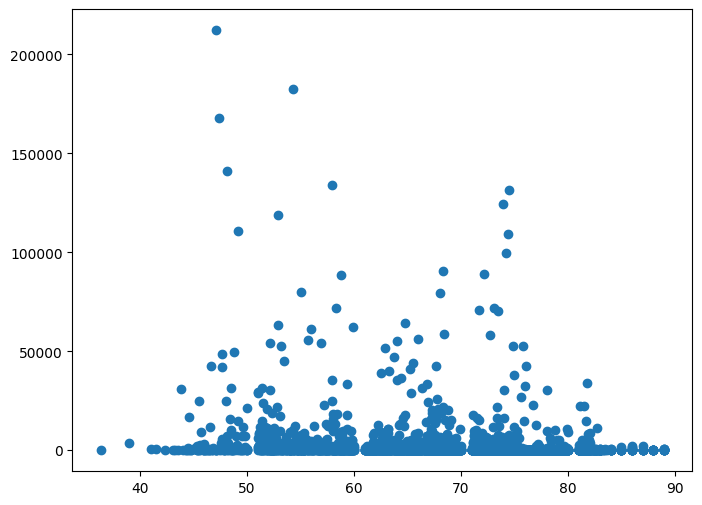

In [ ]:
# Measles

plt.figure(figsize=(8,6))
plt.scatter(df['Life expectancy'],df['Measles'])
plt.show()

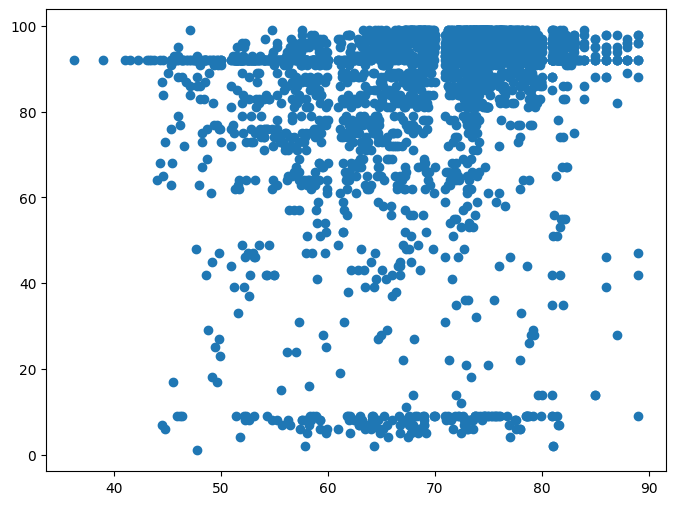

In [ ]:
# Hepatitis B

plt.figure(figsize=(8,6))
plt.scatter(df['Life expectancy'],df['Hepatitis B'])
plt.show()

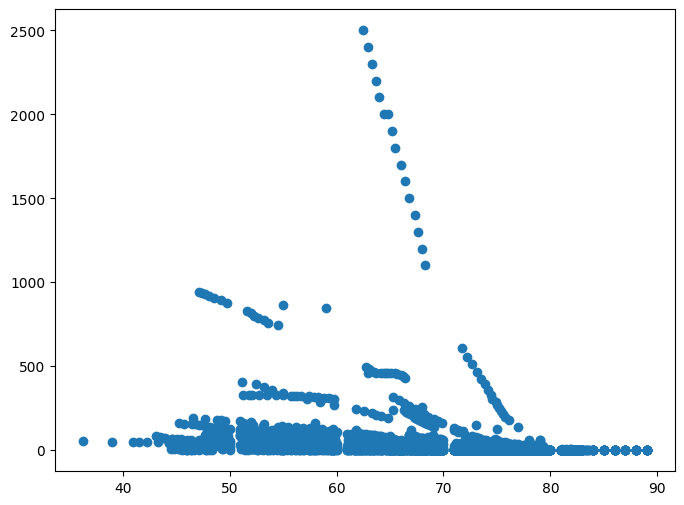

In [ ]:
# under-five deaths

plt.figure(figsize=(8,6))
plt.scatter(df['Life expectancy'],df['under-five deaths'])
plt.show()

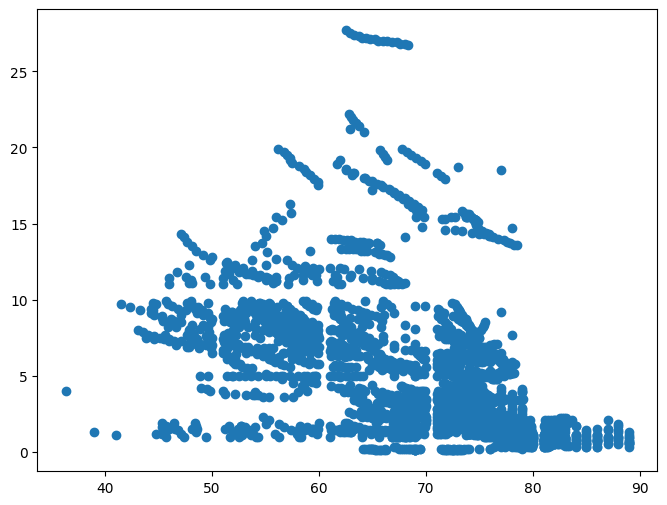

In [ ]:
# thinness  1-19 years

plt.figure(figsize=(8,6))
plt.scatter(df['Life expectancy'],df['thinness  1-19 years'])
plt.show()

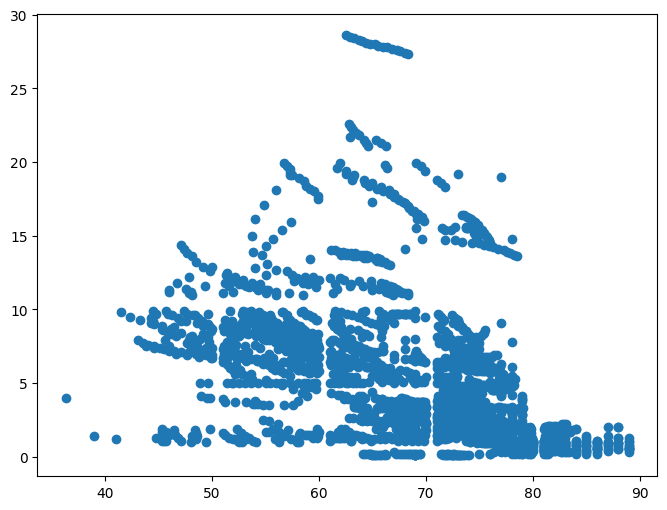

In [ ]:
# thinness 5-9 years

plt.figure(figsize=(8,6))
plt.scatter(df['Life expectancy'],df['thinness 5-9 years'])
plt.show()

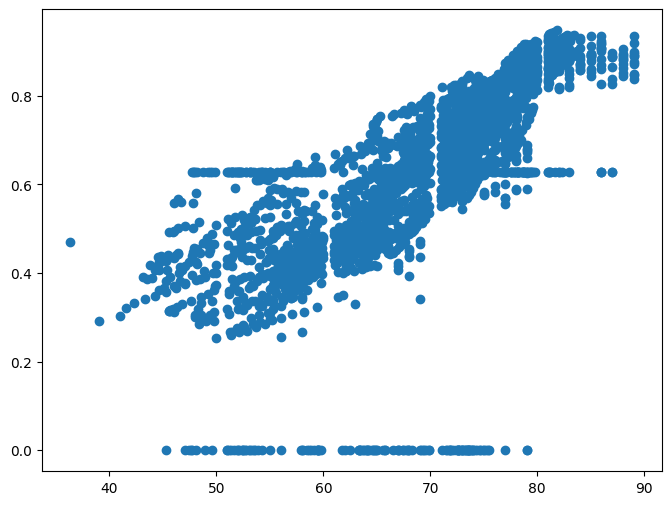

In [ ]:
# Income composition of resources

plt.figure(figsize=(8,6))
plt.scatter(df['Life expectancy'],df['Income composition of resources'])
plt.show()

In [ ]:
df.head(2)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0


In [ ]:
pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',10000)

In [ ]:
  df.groupby('Country')['Life expectancy'].sum().astype(int).reset_index(name = 'Life Expectancy')

,Country,Life Expectancy
0,Afghanistan,931
1,Albania,1202
2,Algeria,1177
3,Angola,784
4,Antigua and Barbuda,1200
5,Argentina,1202
6,Armenia,1174
7,Australia,1309
8,Austria,1303
9,Azerbaijan,1131


In [ ]:
df.groupby('Country')['Adult Mortality'].sum().astype(int).reset_index(name = 'Adult Mortality')

,Country,Adult Mortality
0,Afghanistan,4305
1,Albania,721
2,Algeria,1731
3,Angola,5257
4,Antigua and Barbuda,2040
5,Argentina,1696
6,Armenia,1878
7,Australia,1011
8,Austria,1052
9,Azerbaijan,1843


In [ ]:
df.groupby('Country')['Population'].sum().astype(int).reset_index(name = 'Population')

,Country,Population
0,Afghanistan,159556157
1,Albania,11150586
2,Algeria,346397239
3,Angola,162353587
4,Antigua and Barbuda,204054000
5,Argentina,321939272
6,Armenia,16242634
7,Australia,73392158
8,Austria,103598078
9,Azerbaijan,34517928


In [ ]:
df.groupby('Country')['GDP'].sum().astype(int).reset_index(name = 'GDP')

,Country,GDP
0,Afghanistan,5440
1,Albania,33915
2,Algeria,45565
3,Angola,31602
4,Antigua and Barbuda,156148
5,Argentina,111977
6,Armenia,31999
7,Australia,554201
8,Austria,541239
9,Azerbaijan,52847


In [ ]:
df['Country'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia (Plurinational State of)', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Brunei Darussalam', 'Bulgaria',
       'Burkina Faso', 'Burundi', "CÃ´te d'Ivoire", 'Cabo Verde',
       'Cambodia', 'Cameroon', 'Canada', 'Central African Republic',
       'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo',
       'Cook Islands', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus',
       'Czechia', "Democratic People's Republic of Korea",
       'Democratic Republic of the Congo', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia',
       'Georgia', 'Germany

In [ ]:
df['Status'].unique()

array(['Developing', 'Developed'], dtype=object)

In [ ]:
df.replace({'Status':{'Developing':0,'Developed':1}},inplace=True)

In [ ]:
df['Status'].unique()

array([0, 1])

In [ ]:
from sklearn import preprocessing

In [ ]:
label_encoder = preprocessing.LabelEncoder()
df['Country']=label_encoder.fit_transform(df['Country'])

In [ ]:
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,0,2015,0,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,0,2014,0,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,0,2013,0,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,0,2012,0,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,0,2011,0,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [ ]:
df.tail()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
2933,192,2004,0,44.3,723.0,27,4.36,0.0,68.0,31,27.1,42,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,192,2003,0,44.5,715.0,26,4.06,0.0,7.0,998,26.7,41,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,192,2002,0,44.8,73.0,25,4.43,0.0,73.0,304,26.3,40,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,192,2001,0,45.3,686.0,25,1.72,0.0,76.0,529,25.9,39,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8
2937,192,2000,0,46.0,665.0,24,1.68,0.0,79.0,1483,25.5,39,78.0,7.10,78.0,43.5,547.358878,12222251.0,11.0,11.2,0.434,9.8


In [ ]:
df.corr()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
Country,1.000000,0.001342,0.031635,-0.016772,0.039569,-0.030528,-0.061256,-0.032983,-0.014544,-0.024593,0.017513,-0.026509,0.017862,0.053392,-0.003503,0.090206,-0.034409,-0.014347,0.008464,0.022891,-0.023554,-0.023323
Year,0.001342,1.000000,-0.001864,0.169527,-0.079535,-0.037415,-0.069147,0.031400,0.021302,-0.082493,0.108314,-0.042937,0.093717,0.084319,0.131373,-0.139741,0.091480,0.014951,-0.047564,-0.050604,0.236339,0.203517
Status,0.031635,-0.001864,1.000000,0.481999,-0.314894,-0.112252,0.579662,0.454261,0.127008,-0.076955,0.310958,-0.115195,0.220041,0.289808,0.215281,-0.148590,0.445981,-0.041091,-0.368125,-0.366449,0.457339,0.492984
Life expectancy,-0.016772,0.169527,0.481999,1.000000,-0.696312,-0.196514,0.389914,0.381815,0.170579,-0.157557,0.559364,-0.222482,0.461449,0.207902,0.472250,-0.556430,0.430923,-0.019634,-0.472576,-0.466946,0.692440,0.713782
Adult Mortality,0.039569,-0.079535,-0.314894,-0.696312,1.000000,0.078890,-0.190191,-0.242628,-0.123287,0.031293,-0.382323,0.094280,-0.272585,-0.111236,-0.270301,0.523886,-0.281434,-0.012474,0.300664,0.306083,-0.440115,-0.433415
infant deaths,-0.030528,-0.037415,-0.112252,-0.196514,0.078890,1.000000,-0.112918,-0.085612,-0.167421,0.501128,-0.227240,0.996629,-0.170688,-0.126652,-0.175376,0.025231,-0.102829,0.548522,0.465634,0.471263,-0.143646,-0.190951
Alcohol,-0.061256,-0.069147,0.579662,0.389914,-0.190191,-0.112918,1.000000,0.344410,0.090850,-0.049752,0.314793,-0.109790,0.213378,0.294035,0.212388,-0.046235,0.313060,-0.030174,-0.415621,-0.404582,0.414548,0.498899
percentage expenditure,-0.032983,0.031400,0.454261,0.381815,-0.242628,-0.085612,0.344410,1.000000,0.039528,-0.056596,0.228602,-0.087852,0.147162,0.172674,0.142506,-0.097857,0.901819,-0.024648,-0.251334,-0.252840,0.380328,0.386076
Hepatitis B,-0.014544,0.021302,0.127008,0.170579,-0.123287,-0.167421,0.090850,0.039528,1.000000,-0.073021,0.112434,-0.170549,0.364043,0.056240,0.449151,-0.085497,0.076660,-0.117007,-0.097574,-0.100577,0.117519,0.141275
Measles,-0.024593,-0.082493,-0.076955,-0.157557,0.031293,0.501128,-0.049752,-0.056596,-0.073021,1.000000,-0.175912,0.507809,-0.136172,-0.104706,-0.142385,0.030899,-0.069253,0.236250,0.224711,0.220982,-0.115723,-0.120799


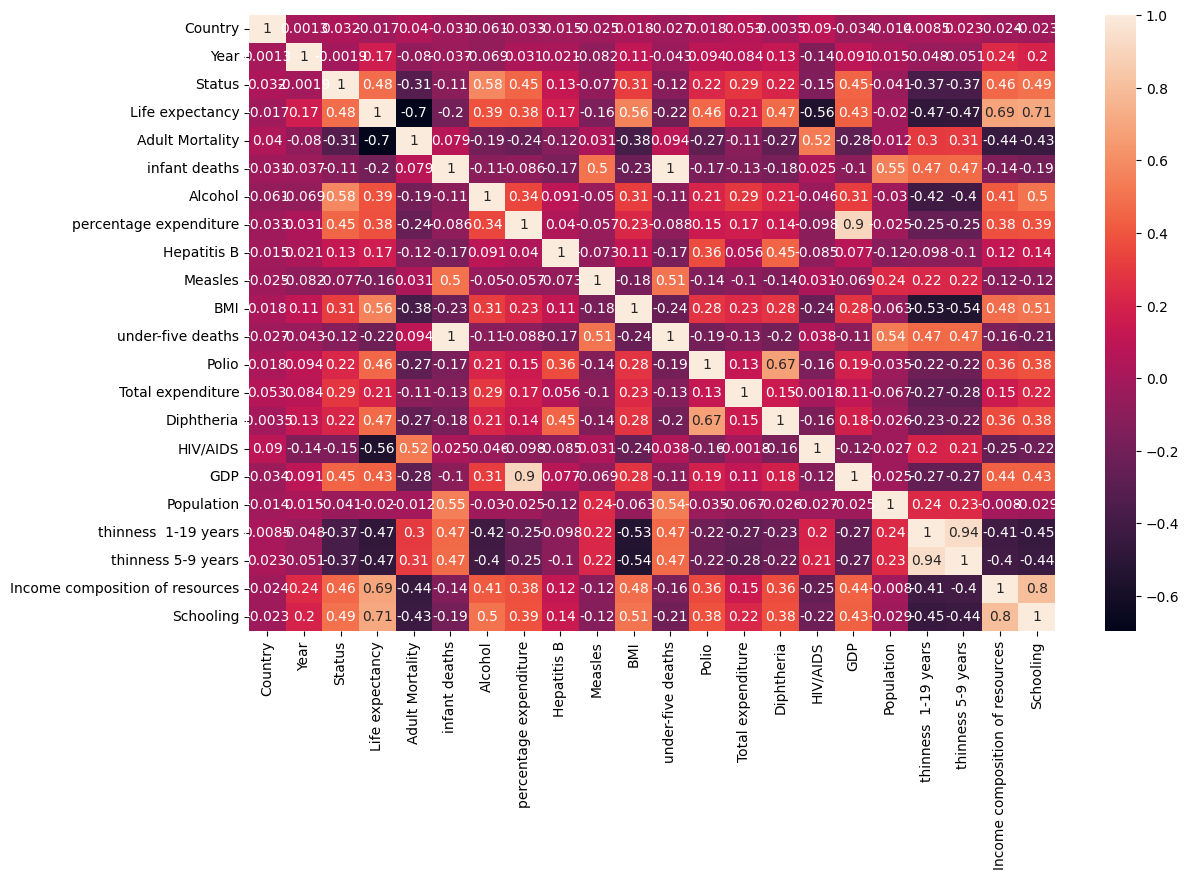

In [ ]:
plt.figure(figsize=(13,8))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [ ]:
dependent_variable=df['Life expectancy']
independent_variable=df.drop(columns='Life expectancy')

In [ ]:
dependent_variable.head()

0    65.0
1    59.9
2    59.9
3    59.5
4    59.2
Name: Life expectancy, dtype: float64

In [ ]:
independent_variable.head()

,Country,Year,Status,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,0,2015,0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,0,2014,0,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,0,2013,0,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,0,2012,0,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,0,2011,0,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [ ]:
X=independent_variable
y=dependent_variable

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=0)

In [ ]:
X_train[::10]

,Country,Year,Status,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
683,42,2005,1,65.0,0,11.410,1562.520827,88.0,1,55.3,0,98.0,6.37,98.0,0.1,25324.486660,1.276580e+05,0.9,1.0,0.826,13.5
1581,100,2004,0,615.0,40,1.110,58.135833,89.0,1116,15.5,65,94.0,7.82,89.0,23.4,274.225629,1.267638e+06,7.5,7.4,0.366,10.0
188,11,2003,0,85.0,0,2.160,1214.558167,98.0,12,55.2,0,97.0,3.74,97.0,0.1,14221.992590,1.275338e+07,6.1,5.9,0.798,13.7
944,60,2001,0,13.0,3,13.890,3451.185079,28.0,0,55.2,4,98.0,9.89,97.0,0.1,22527.317750,6.135743e+07,0.7,0.6,0.849,15.6
1094,70,2011,0,289.0,4,3.570,40.453674,86.0,0,23.7,7,85.0,5.46,86.0,5.7,692.699890,1.596154e+06,7.8,7.7,0.410,9.0
1196,76,2005,0,211.0,1500,1.270,3.509637,8.0,36711,13.5,2000,65.0,4.28,65.0,0.3,77.819000,1.144119e+09,27.2,28.1,0.526,9.4
191,11,2000,0,92.0,0,2.150,167.727064,97.0,6,54.5,0,97.0,3.51,97.0,0.1,13636.346680,1.275338e+07,6.2,6.0,0.786,13.2
838,54,2011,0,344.0,3,10.990,1493.051277,92.0,0,22.6,4,39.0,3.29,41.0,7.7,21451.886170,9.942900e+04,8.9,8.8,0.580,9.2
57,3,2006,0,381.0,90,5.840,25.086888,92.0,765,18.2,143,36.0,4.54,34.0,2.5,262.415149,2.262399e+06,9.8,9.7,0.439,7.2
2570,169,2014,0,152.0,8,6.410,789.077295,99.0,0,32.4,10,99.0,4.12,99.0,0.1,5941.847100,6.841677e+07,7.8,7.8,0.737,13.6


In [ ]:
# transform data into min max scalar

scalar=MinMaxScaler()
X_train=scalar.fit_transform(X_train)
X_test=scalar.transform(X_test)

In [ ]:
X_train[::10]

array([[0.21875   , 0.33333333, 1.        , ..., 0.03157895, 0.87130802,
        0.65217391],
       [0.52083333, 0.26666667, 0.        , ..., 0.25614035, 0.38607595,
        0.48309179],
       [0.05729167, 0.2       , 0.        , ..., 0.20350877, 0.84177215,
        0.66183575],
       ...,
       [0.85416667, 0.53333333, 0.        , ..., 0.21754386, 0.54219409,
        0.51207729],
       [0.16666667, 0.4       , 0.        , ..., 0.03859649, 0.31962025,
        0.26570048],
       [0.61458333, 0.        , 0.        , ..., 0.67017544, 0.46308017,
        0.42995169]])

In [ ]:
# implementing Linear Regression

regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [ ]:
regressor.intercept_

54.96242493947232

In [ ]:
regressor.coef_

array([   0.86365027,   -0.28401158,    1.52227961,  -14.21795563,
        183.67760538,    1.20482417,    0.30774845,   -1.61701444,
         -4.46949387,    4.06132744, -191.92221985,    2.83066349,
          2.01532426,    3.91773249,  -23.38398969,    5.57877545,
          1.47502344,   -2.61455595,    0.83443677,    5.75178245,
         12.13430828])

In [ ]:
# prediction of the data

y_pred_train = regressor.predict(X_train)

In [ ]:
y_train

683     78.7
478     58.5
2359    76.2
971     58.2
880     78.0
1830    81.7
2779    67.0
1370    56.8
1477    52.2
2450    73.8
1581    45.1
849     52.7
1343    72.1
2523    83.0
719     66.6
1793    62.8
1379    66.1
563     75.4
2356    77.2
1371    55.3
188     75.0
1735    75.6
2236    74.1
2058    83.0
817     68.8
686     78.4
2054    73.7
878     71.9
2444    74.5
1070    69.4
944     79.0
921     79.6
2106    79.0
597     61.8
314     65.7
2241    73.2
37      74.7
425     54.1
641     78.0
1999    72.5
1094    57.1
850     64.7
1271    81.7
299     64.2
443     48.2
1203    68.9
961     61.0
596     62.2
661     78.8
1465    74.5
1196    64.4
1098    55.0
1366    61.2
546     81.0
1922    79.4
1961    77.5
2358    76.6
2802    78.1
1765    56.7
2697    66.3
191     74.5
2016    74.2
2035    67.2
1151    71.6
518     48.6
2675    74.2
1893    54.5
229     73.0
351     47.8
905     68.7
838     56.2
1303    75.0
1568    58.7
564     75.2
1511    72.8
1399    74.0
723     58.8

In [ ]:
y_pred_train

array([78.75061348, 56.49754505, 77.1981021 , ..., 63.42436091,
       66.95491101, 70.91164449])

In [ ]:
y_pred=regressor.predict(X_test)

In [ ]:
y_test

867     77.3
1780    66.6
621     52.6
2715    61.5
2717    60.0
2855    69.3
1410    71.1
933     81.5
2572    74.3
1376    51.9
1554    65.5
503     87.0
672     76.9
22      76.1
298     65.0
1588    74.6
2718    59.3
338     64.2
1311    73.0
1540    81.4
1615    71.8
1724    65.9
30      73.6
2518    79.9
2541    71.7
2614    62.0
1846    81.5
305     74.0
454     72.4
572     73.1
1927    76.4
2931    45.4
2777    77.8
2669    74.8
1931    75.6
991     71.7
224     72.3
118     81.7
2158    68.0
989     72.3
2780    59.7
2817    76.4
918     83.0
1341    72.5
1592    74.0
682     78.8
1627    54.3
2174    74.3
1087    52.9
2088    82.0
217     74.1
977     55.9
1523    73.4
1147    72.8
1056    77.0
825     71.7
2434    88.0
2443    74.6
483     55.9
1754    72.3
1417    67.6
2018    72.2
2094    83.0
2604    67.4
886     62.6
982     73.9
1763    68.6
1512    72.7
2307    43.3
92      74.1
2102    76.0
1318    82.5
1293    89.0
2588    75.1
465     68.3
1903    49.2
195     77.0

In [ ]:
y_pred

array([76.60748729, 65.86386794, 52.95520899, 67.06854119, 59.99714125,
       61.69269252, 71.08211276, 78.91381707, 70.92266242, 46.71250268,
       67.83158322, 80.00523939, 72.30625094, 73.28717976, 60.50288406,
       71.83053078, 60.20291796, 66.40557679, 70.16961214, 81.63687791,
       69.21760245, 74.35299694, 73.00039452, 81.15375644, 67.73897919,
       61.0404375 , 82.28913416, 71.74204149, 70.19996456, 72.96532841,
       75.62758021, 53.40573384, 75.53613071, 76.63061922, 75.32013251,
       71.72505735, 74.01174673, 83.51160736, 63.34023187, 70.84169942,
       64.82797636, 73.6624526 , 75.7874582 , 73.65591703, 71.54594971,
       78.66599285, 59.03486141, 72.77194853, 54.40867247, 72.35939682,
       74.22848711, 62.176502  , 78.25932236, 69.52615435, 68.17323893,
       71.20971396, 81.30347857, 71.08754486, 59.66432292, 71.07135527,
       69.69951358, 71.37413337, 72.47808416, 67.93189971, 57.96849312,
       73.74367622, 71.14702032, 73.68673692, 64.61513241, 75.96

In [ ]:
# finding the accuracy of the model

r2_score(y_train,y_pred_train)*100

81.9677107863944

In [ ]:
r2_score(y_test,y_pred)*100

82.18933448058742

In [ ]:
# implementing ridge

from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [ ]:
ridge=Ridge()
params={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,50,55,100]}
ridge_regressor=GridSearchCV(ridge,params,scoring='neg_mean_squared_error',cv=5)
ridge_regressor.fit(X_train,y_train)


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 50, 55, 100]},
             scoring='neg_mean_squared_error')

In [ ]:
ridge_regressor.best_params_

{'alpha': 0.001}

In [ ]:
ridge_regressor.best_score_

-16.56581178188203

In [ ]:
# Lasso
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [ ]:
lasso=Lasso()
params={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,50,55,100]}
lasso_regressor=GridSearchCV(lasso,params,scoring='neg_mean_squared_error',cv=5)
lasso_regressor.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.562e+04, tolerance: 1.727e+01
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.517e+04, tolerance: 1.649e+01
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.515e+04, tolerance: 1.692e

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 50, 55, 100]},
             scoring='neg_mean_squared_error')

In [ ]:
lasso_regressor.best_params_

{'alpha': 1e-08}

In [ ]:
lasso_regressor.best_score_

-16.5677406496903

In [ ]:
y_pred=regressor.predict(X_test)
from sklearn.metrics import r2_score
r2_score = r2_score(y_pred,y_test)
print(r2_score*100)

76.19061568063447


In [ ]:
#Adjusted R-Squared Error
n = X.shape[0]
p = X.shape[1]
adj_r2 = 1-(1-r2_score)*((n-1)/(n-p-1))

In [ ]:
n = X.shape[0]
p = X.shape[1]
adj_r2 = 1-(1-r2_score)*((n-1)/(n-p-1))

In [ ]:
print('Adjusted R-squared score',adj_r2*100)

Adjusted R-squared score 76.01914892113287


In [ ]:
# Calculated 'Mean_Squared_Error' and 'Root_Mean_Squared_Error **bold text'** bold text
from sklearn.metrics import mean_squared_error
import math

In [ ]:

#Mean squared error
mean_squared_error(y_train,y_pred_train)

16.25035143782532

In [ ]:
# Root Mean Squared Error
np.sqrt(mean_squared_error(y_train,y_pred_train))

4.031172464410983